# Noise Simulators

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from skclean.simulate_noise import UniformNoise, CCNoise, BCNoise

%load_ext autoreload
%autoreload 2

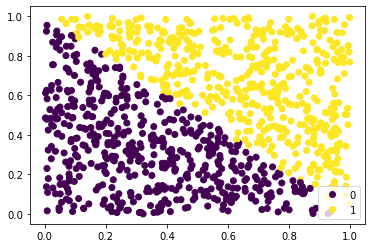

In [2]:
X = np.random.uniform(size=(1000,2))
y = (np.dot(X,[.5,.5])>.5).astype('int')
scatter = plt.scatter(X[:,0],X[:,1],c=y);
plt.legend(handles=scatter.legend_elements()[0], labels=['0','1'])

## Uniform label noise

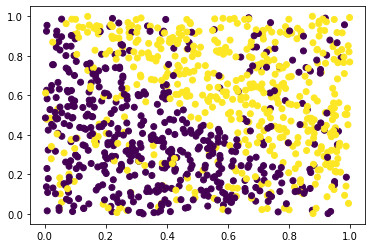

In [3]:
_,yu = UniformNoise(.2).simulate_noise(X,y)
plt.scatter(X[:,0],X[:,1],c=yu);

## Class-Conditional Noise

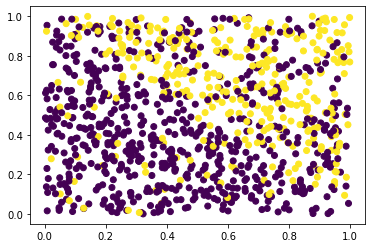

In [4]:
_,ycc = CCNoise([[.9,.1],[.4,.6]]).simulate_noise(X,y)
plt.scatter(X[:,0],X[:,1],c=ycc);

In [5]:
confusion_matrix(y,ycc,normalize='true')

array([[0.90715667, 0.09284333],
       [0.42028986, 0.57971014]])

## Boundary Consistent Noise


[[0.9 0.1]
 [0.1 0.9]]


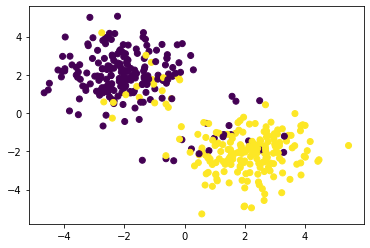

In [6]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC, LinearSVC

X,y = make_blobs(400,centers=[[-2,2],
                              [ 2, -2]])

clf = SVC(probability=True, kernel='linear')
_, ybc = BCNoise(clf,noise_level=.1).simulate_noise(X,y)
print(confusion_matrix(y,ybc,normalize='true'))
plt.scatter(X[:,0],X[:,1],c=ybc);

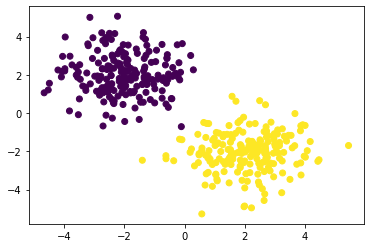

In [7]:
plt.scatter(X[:,0],X[:,1],c=y);